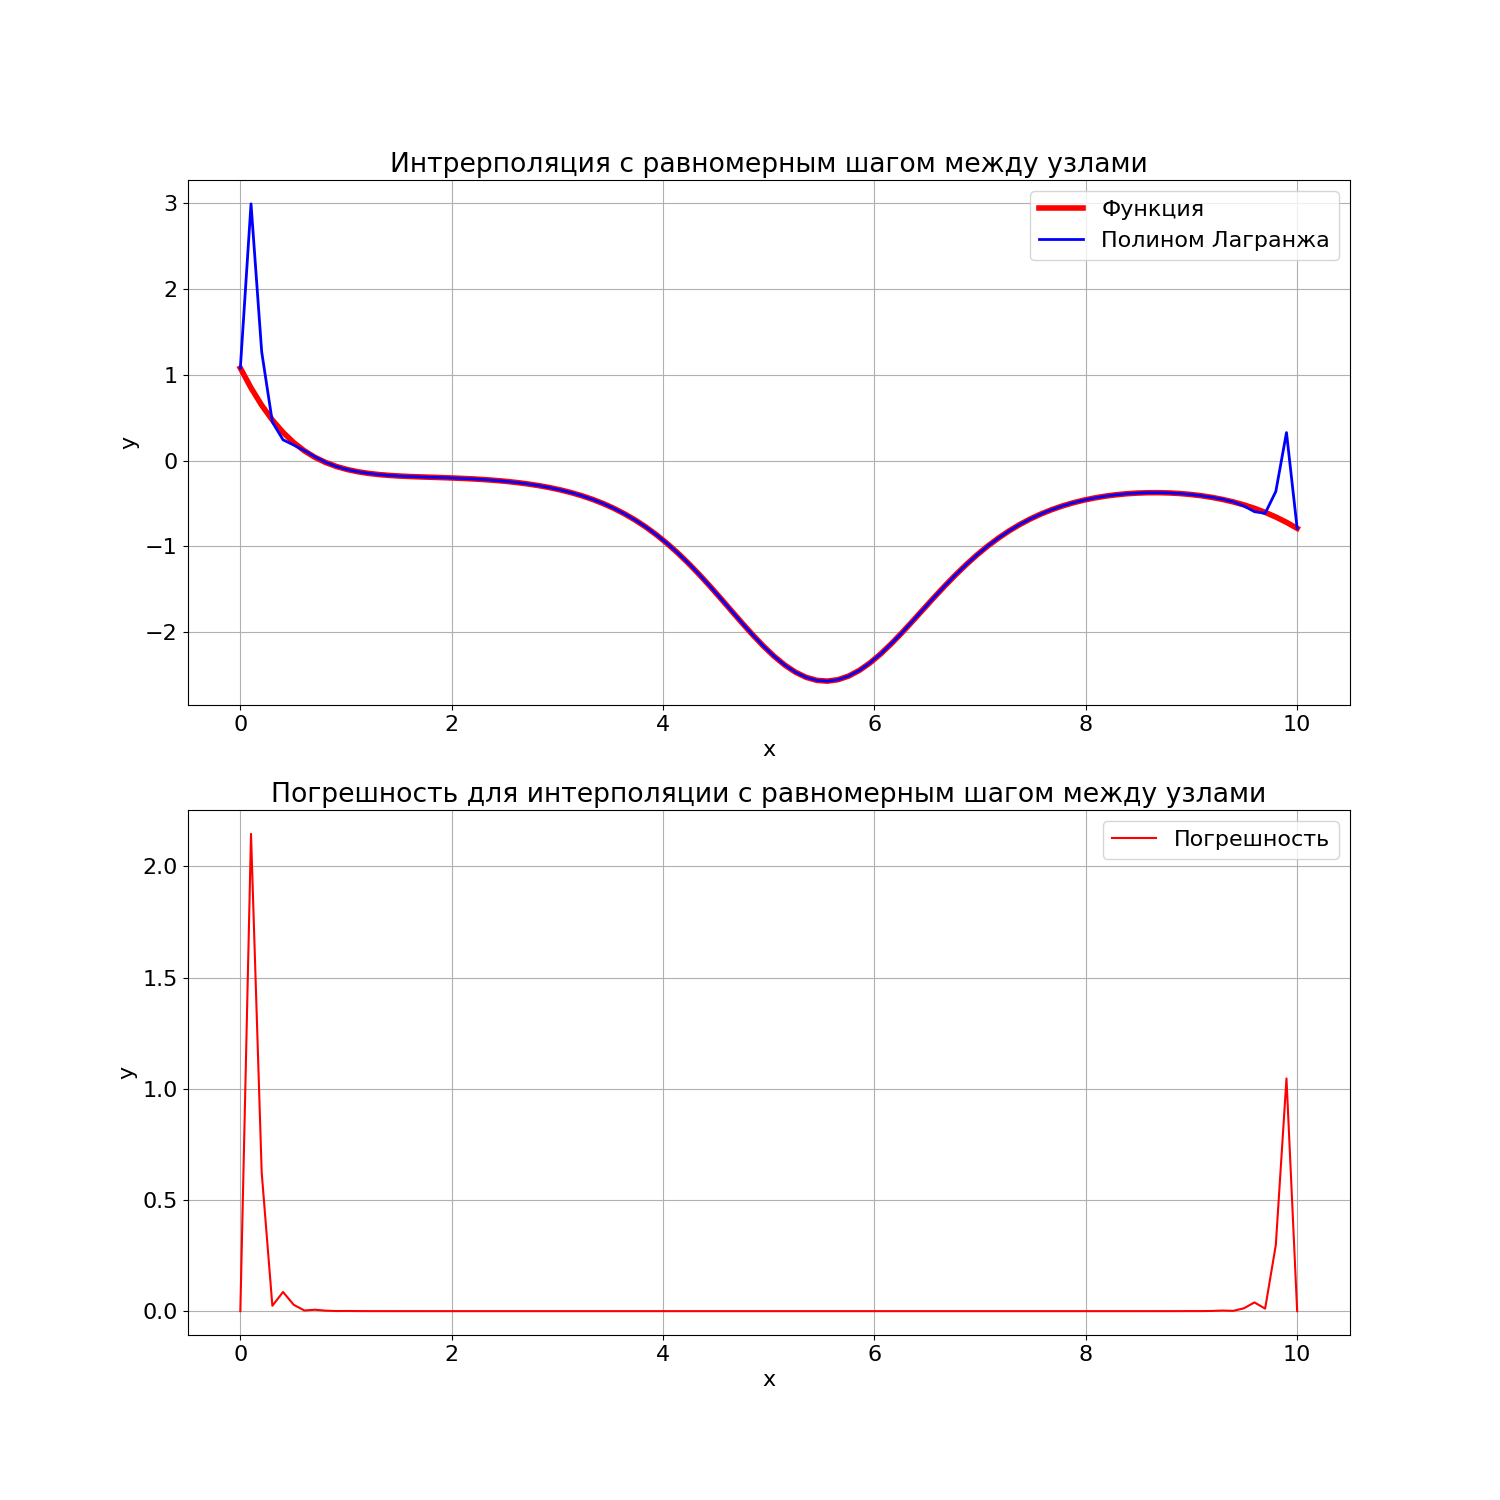

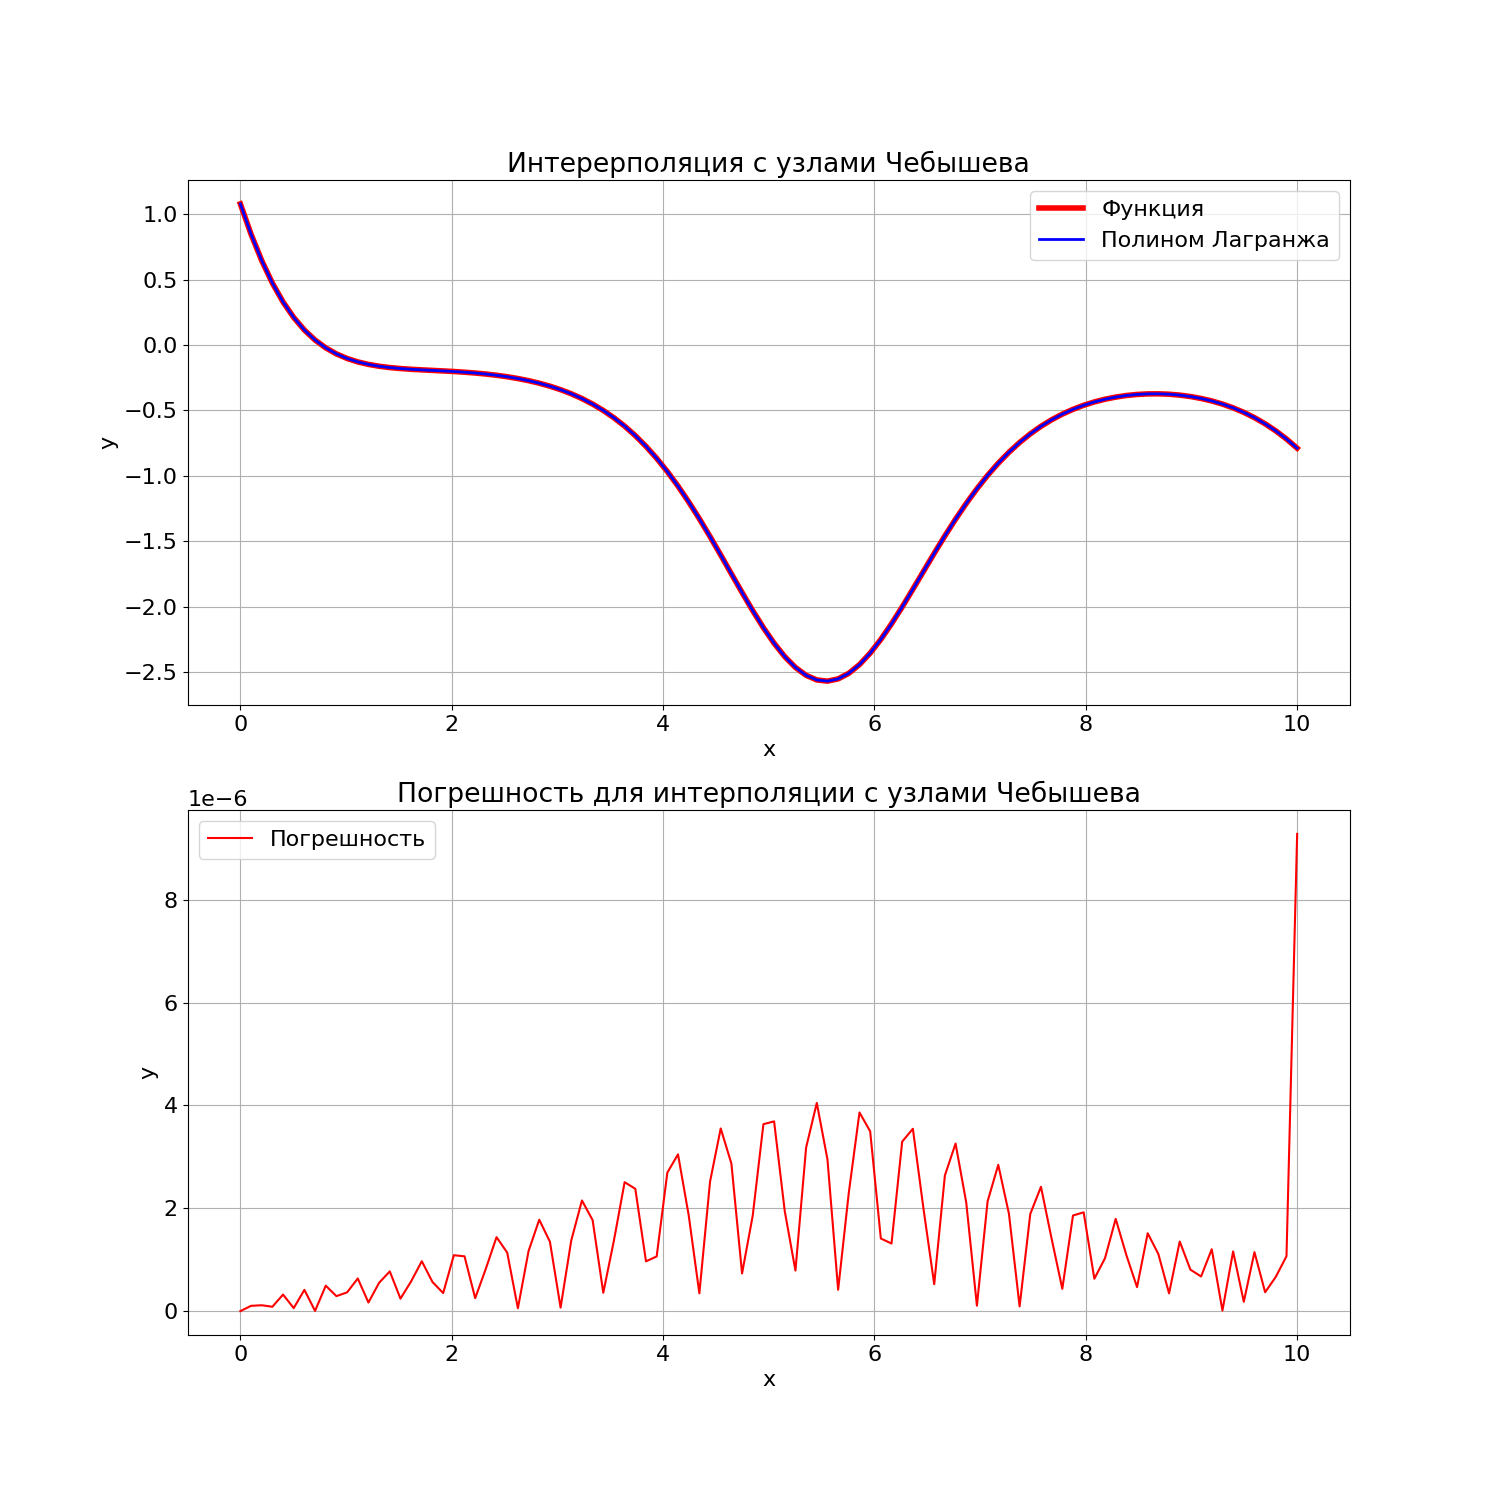

In [2]:
from matplotlib import pyplot as plt
import numpy as np


n = 35
a = 0
b = 10


def f(x):
    return 2 ** (np.cos(x) - np.sin(x)) * np.cos(1 + np.log(1 + x))


def lagrange(arg, x, y):
    L = 0
    for i in range(len(y)):
        F = 1
        for j in range(len(x)):
            if j != i:
                F *= (arg - x[j]) / (x[i] - x[j])
        L += y[i] * F
    return L


def interpolate(a, b, n):
    step = (b - a) / (n-1)
    x_node = np.arange(a, b+step, step)
    y_node = f(x_node)
    #x_new = [((x_node[i + 1] + x_node[i]) / 2) for i in range(len(x_node)-1)]
    x_new = np.linspace(0, 10, 100)
    y_new = [lagrange(x, x_node, y_node) for x in x_new]
    y_true = [f(x) for x in x_new]
    fig, gr = plt.subplots(2, figsize=(15, 15))
    plt.rcParams['font.size'] = '16'
    gr[0].plot(x_new, y_true, color='r', label='Функция', linewidth=4)
    gr[0].plot(x_new, y_new, color='b', label='Полином Лагранжа',linewidth=2)
    gr[1].plot(x_new, [abs(y_new[i] - y_true[i]) for i in range(len(y_new))], color='r', label='Погрешность')
    gr[0].set(title = "Интерполяция с равномерным шагом между узлами")
    gr[1].set(title = "Погрешность для интерполяции с равномерным шагом между узлами")
    for i in gr:
        i.set_xlabel("x")
        i.set_ylabel("y")
        i.legend()
        i.grid(True)
    plt.show()


def interpolateChebyshev(a, b, n):
    x_node = []
    for i in range(n):
        x_node.append((b + a) / 2 + (b - a) * np.cos(np.pi * (2 * (i + 1) / (2 * n))) / 2)
    y_node = [f(x) for x in x_node]
    #x_new = [(x_node[i + 1] + x_node[i]) / 2 for i in range(len(x_node) - 1)]
    x_new = np.linspace(0, 10, 100)
    y_new = [lagrange(x, x_node, y_node) for x in x_new]
    y_true = [f(x) for x in x_new]
    fig, gr = plt.subplots(2, figsize=(15, 15))
    plt.rcParams['font.size'] = '16'
    gr[0].plot(x_new, y_true, color='r', label='Функция', linewidth=4)
    gr[0].plot(x_new, y_new, color='b', label='Полином Лагранжа', linewidth=2)
    gr[1].plot(x_new, [abs(y_new[i] - y_true[i]) for i in range(len(y_new))], color='r', label='Погрешность')
    gr[0].set(title="Интерерполяция с узлами Чебышева")
    gr[1].set(title="Погрешность для интерполяции с узлами Чебышева")
    for i in gr:
        i.set_xlabel("x")
        i.set_ylabel("y")
        i.legend()
        i.grid(True)
    plt.show()


interpolate(a, b, n)
interpolateChebyshev(a, b, n)
